In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

C:\Users\clari\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\clari\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
Task_A= pd.read_table('task_a.txt', sep='\s+') 
Task_B = pd.read_table('task_b.txt', sep='\s+')


In [3]:
Task_A

,CHR,SNP,UNADJ,GC,QQ,BONF,HOLM,SIDAK_SS,SIDAK_SD,FDR_BH,FDR_BY
0,6,rs11962226,2.168000e-15,0.000073,3.471000e-07,3.123000e-09,3.123000e-09,3.123000e-09,3.123000e-09,1.610000e-09,2.376000e-08
1,9,rs7031414,3.315000e-15,0.000082,1.041000e-06,4.775000e-09,4.775000e-09,4.775000e-09,4.775000e-09,1.610000e-09,2.376000e-08
2,3,rs9311319,4.536000e-15,0.000089,1.736000e-06,6.534000e-09,6.534000e-09,6.534000e-09,6.534000e-09,1.610000e-09,2.376000e-08
3,4,rs10007859,4.953000e-15,0.000091,2.430000e-06,7.135000e-09,7.135000e-09,7.135000e-09,7.135000e-09,1.610000e-09,2.376000e-08
4,1,rs17130151,5.589000e-15,0.000094,3.124000e-06,8.050000e-09,8.050000e-09,8.050000e-09,8.050000e-09,1.610000e-09,2.376000e-08
...,...,...,...,...,...,...,...,...,...,...,...
1440499,23,rs5983749,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1440500,25,rs35755665,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1440501,25,rs28602757,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1440502,25,rs35964637,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [17]:
import scipy
from scipy import stats

In [19]:
model= pd.read_table('plink_model.txt', sep="\s+")
model

,CHR,SNP,A1,A2,TEST,AFF,UNAFF,CHISQ,DF,P
0,1,rs10458597,T,C,TREND,4/230,13/973,0.1565,1.0,6.924000e-01
1,1,rs2185539,T,C,TREND,7/231,0/1000,29.7500,1.0,4.920000e-08
2,1,rs11240767,T,C,TREND,10/228,15/985,6.2060,1.0,1.273000e-02
3,1,rs12564807,G,A,TREND,0/238,0/1000,NaN,NaN,NaN
4,1,rs3131972,A,G,TREND,82/156,259/741,6.6180,1.0,1.010000e-02
...,...,...,...,...,...,...,...,...,...,...
1440499,25,rs4518813,G,A,TREND,91/145,414/570,0.8879,1.0,3.460000e-01
1440500,25,rs5940653,T,G,TREND,71/167,350/642,2.5160,1.0,1.127000e-01
1440501,25,rs5983854,G,T,TREND,72/166,382/614,5.2930,1.0,2.141000e-02
1440502,25,rs3093449,A,G,TREND,30/208,30/970,31.2900,1.0,2.228000e-08


In [144]:
lamb = np.median(~model['CHISQ'].isna())/scipy.stats.chi2.ppf(0.5,1)
lamb_bonf= round(lamb, 3)
lamb_bonf

2.198

In [167]:
lamb = np.median(~model['CHISQ'].isna())/scipy.stats.chi2.ppf(0.66319,0.99)
lamb_cal= round(lamb, 3)
lamb_cal

1.099

In [169]:
lamb = np.median(~model['CHISQ'].isna())/scipy.stats.chi2.ppf(0.381,1)
lamb_uncal= round(lamb, 3)
lamb_uncal

4.044

In [171]:
import sys


In [175]:
print('\u03BB')

λ


In [173]:
sys.getdefaultencoding()

'utf-8'

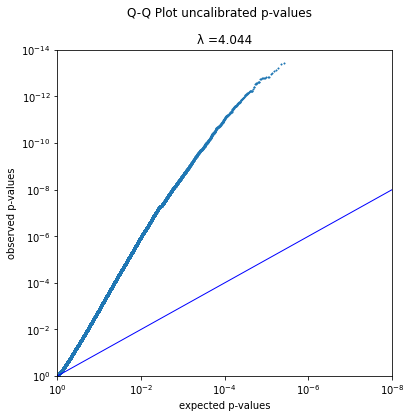

In [183]:
plt.figure(figsize=(6, 6))
plt.scatter(Task_A['QQ'],Task_A['UNADJ'], c='tab:blue',linewidths=.5, s= 2)

plt.xlabel("expected p-values")
plt.ylabel("observed p-values")
plt.xscale("log")
plt.yscale("log")
plt.xlim([1,10**(-8)])
plt.ylim([1,10**(-14)])
plt.plot([1,10**(-14)],[1,10**(-14)],c='blue',linewidth=1)

plt.suptitle("Q-Q Plot uncalibrated p-values")
plt.title('\u03BB =' + str(lamb_uncal))

#plt.legend()
plt.savefig("output_a.jpg")
plt.show()


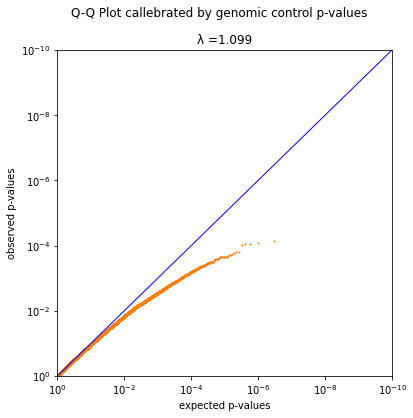

In [184]:
plt.figure(figsize=(6, 6))
plt.scatter(Task_B ['QQ'],Task_B['GC'],c='tab:orange',linewidths=.5, s=2)


plt.xlabel("expected p-values")
plt.ylabel("observed p-values")
plt.xscale("log")
plt.yscale("log")
plt.xlim([1,10**(-10)])
plt.ylim([1,10**(-10)])
plt.plot([1,10**(-10)],[1,10**(-10)],c='blue',linewidth=1)

plt.suptitle("Q-Q Plot callebrated by genomic control p-values")
plt.title('\u03BB =' + str(lamb_cal))

#plt.legend()
plt.savefig("output_b.jpg")
plt.show()


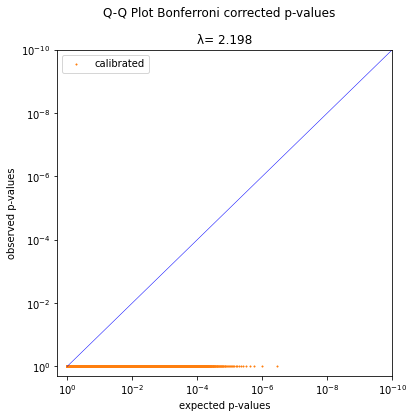

In [187]:
plt.figure(figsize=(6, 6))

plt.scatter(Task_B['QQ'],Task_B['BONF'], c='tab:orange',linewidths=.5,s=2, label ='calibrated')

plt.xlabel("expected p-values")
plt.ylabel("observed p-values")
plt.xscale("log")
plt.yscale("log")

plt.xlim([2,10**(-10)])
plt.ylim([2,10**(-10)])
plt.plot([1,10**(-10)],[1,10**(-10)],c='blue',linewidth=0.5)


plt.suptitle("Q-Q Plot Bonferroni corrected p-values")
plt.title("\u03BB= "+ str(lamb_bonf))

plt.legend()
plt.savefig("output_c_corr.jpg")
plt.show()


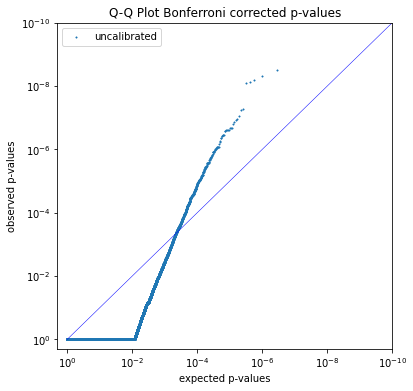

In [9]:
plt.figure(figsize=(6, 6))
plt.scatter(Task_A['QQ'],Task_A['BONF'], c='tab:blue',linewidths=.5, s=2, label ='uncalibrated')

plt.xlabel("expected p-values")
plt.ylabel("observed p-values")
plt.xscale("log")
plt.yscale("log")

plt.xlim([2,10**(-10)])
plt.ylim([2,10**(-10)])
plt.plot([1,10**(-10)],[1,10**(-10)],c='blue',linewidth=0.5)


plt.title("Q-Q Plot Bonferroni corrected p-values")

plt.legend()
plt.savefig("output_c_uncorr.jpg")
plt.show()

(array([      0.,       0.,       0.,       0.,       0., 1440504.,
              0.,       0.,       0.,       0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

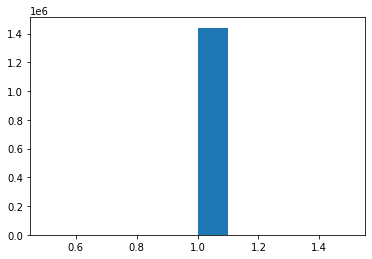

In [79]:
plt.hist(Task_B['BONF'])

(array([5.664000e+03, 1.579000e+03, 1.006000e+03, 8.220000e+02,
        7.060000e+02, 6.040000e+02, 5.700000e+02, 5.620000e+02,
        4.940000e+02, 1.428497e+06]),
 array([3.12300000e-09, 1.00000003e-01, 2.00000002e-01, 3.00000002e-01,
        4.00000002e-01, 5.00000002e-01, 6.00000001e-01, 7.00000001e-01,
        8.00000001e-01, 9.00000000e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

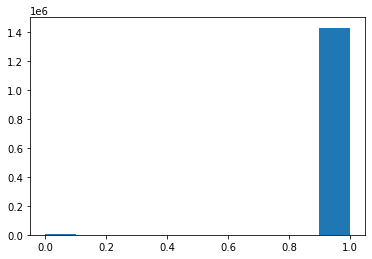

In [80]:
plt.hist(Task_A['BONF'])

In [10]:
import numpy as np
from fastlmm.association import single_snp
from fastlmm.util import example_file 

In [12]:
results_df = single_snp('plink',pheno='plink', count_A1=True)

AssertionError: With multiple phenotypes, an individual's values must either be all missing or have no missing.

In [ ]:
# qq plot
from fastlmm.util.stats import plotp
plotp.qqplot(results_df["PValue"].values, xlim=[0,5], ylim=[0,5])